In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, ReLU, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy





In [3]:
# Read the data from the h5py file and understand the train/test splits (5 points)
data = h5py.File("/content/drive/My Drive/SVHN_single_grey1 (1).h5", 'r')

list(data.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [4]:
# Reshape and normalize the train and test features (5 points
X_test = data["X_test"][:]
X_train = data["X_train"][:]
y_train = data["y_train"][:]
y_test = data["y_test"][:]
X_val = data["X_val"][:]
y_val = data["y_val"][:]

In [5]:
data.close()

In [6]:
X_train[0]

array([[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,  42.9939],
       [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,  84.2949],
       [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 , 115.4228],
       ...,
       [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,  26.0603],
       [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,  30.0661],
       [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,  53.0377]],
      dtype=float32)

In [7]:
#Explore the dataset by printing some values from x and y train
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(0,9):
    print("Label: {}".format(y_train[i]))
# print("Label: {}".format(y_train[1000]))
# plt.imshow(X_train[66])

Label: 2
Label: 6
Label: 7
Label: 4
Label: 4
Label: 0
Label: 3
Label: 0
Label: 7


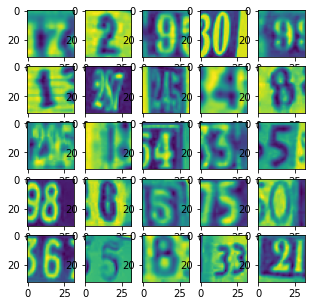

In [8]:
fig=plt.figure(figsize=(5, 5))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

Implement and apply a deep neural network classifier including (feedforward neural network, RELU activations)

In [9]:
# input image dimensions
img_rows, img_cols = 32, 32

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

#Normalizing the input
X_train /= 255
X_test /= 255
X_val /= 255
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
print(X_val.shape[0], 'val samples')

x_train shape: (42000, 32, 32, 1)
42000 train samples
18000 test samples
60000 val samples


In [11]:
np.unique(y_train), np.unique(y_test), np.unique(y_val)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [12]:
num_classes = len(np.unique(y_train))

In [13]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [14]:
# Create a Sequential Model
batch_size = 128
num_classes = 10

#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

In [15]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.001, decay=1e-6, momentum=0.9)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
#Training on the dataset
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          #verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/20
329/329 [==============================] - 169s 513ms/step - loss: 2.3031 - accuracy: 0.1044 - val_loss: 2.3003 - val_accuracy: 0.1168
Epoch 2/20
329/329 [==============================] - 166s 505ms/step - loss: 2.3004 - accuracy: 0.1109 - val_loss: 2.2979 - val_accuracy: 0.1321
Epoch 3/20
329/329 [==============================] - 166s 504ms/step - loss: 2.2979 - accuracy: 0.1260 - val_loss: 2.2941 - val_accuracy: 0.1678
Epoch 4/20
329/329 [==============================] - 166s 505ms/step - loss: 2.2938 - accuracy: 0.1379 - val_loss: 2.2879 - val_accuracy: 0.2283
Epoch 5/20
329/329 [==============================] - 165s 502ms/step - loss: 2.2876 - accuracy: 0.1551 - val_loss: 2.2767 - val_accuracy: 0.2470
Epoch 6/20
329/329 [==============================] - 164s 499ms/step - loss: 2.2739 - accuracy: 0.1739 - val_loss: 2.2524 - val_accuracy: 0.2989
Epoch 7/20
329/329 [==============================] - 164s 500ms/step - loss: 2.2441 - accuracy: 0.1995 - val_loss: 2.1908 -

In [17]:
# Evaluate trained model on the test set

#Testing the model on test set
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 15s 27ms/step - loss: 0.6667 - accuracy: 0.8254
Test loss: 0.6666663885116577
Test accuracy: 0.8253889083862305


In [18]:
# Implement batch normalization for training the neural network

#Initialize the model
model_1 = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3
model_1.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape,name='conv_1'))
# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_1', epsilon=0.001, momentum=0.99))
# Apply ReLU activation
model_1.add(ReLU(name='relu_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 
model_1.add(Conv2D(64, (3, 3), name='conv_2'))
# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_2', epsilon=0.001, momentum=0.99))
# Apply ReLU activation
model_1.add(ReLU(name='relu_2'))

#Add a MaxPooling Layer of size 2X2 
model_1.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_3', epsilon=0.001, momentum=0.99))

#Flatten the layer
model_1.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model_1.add(Dense(128, activation='relu',name='dense_1'))

# Apply Batchnorm
model_1.add(keras.layers.BatchNormalization(name='batchnorm_4', epsilon=0.001, momentum=0.99))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model_1.add(Dense(num_classes, activation='softmax',name='dense_2'))

In [19]:

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = SGD(lr=0.01, decay=1e-6, momentum=0.9)
#Set the loss function and optimizer for the model training
model_1.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [20]:
#Training on the dataset
model_1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=20,
          verbose=1,
          
          validation_data=(X_val, y_val))

Epoch 1/20
329/329 [==============================] - 207s 628ms/step - loss: 0.7746 - accuracy: 0.7565 - val_loss: 0.9465 - val_accuracy: 0.7136
Epoch 2/20
329/329 [==============================] - 206s 626ms/step - loss: 0.3830 - accuracy: 0.8859 - val_loss: 0.5573 - val_accuracy: 0.8290
Epoch 3/20
329/329 [==============================] - 207s 629ms/step - loss: 0.2855 - accuracy: 0.9169 - val_loss: 0.3372 - val_accuracy: 0.9023
Epoch 4/20
329/329 [==============================] - 207s 629ms/step - loss: 0.2225 - accuracy: 0.9350 - val_loss: 0.2392 - val_accuracy: 0.9326
Epoch 5/20
329/329 [==============================] - 207s 628ms/step - loss: 0.1701 - accuracy: 0.9521 - val_loss: 0.2585 - val_accuracy: 0.9244
Epoch 6/20
329/329 [==============================] - 208s 631ms/step - loss: 0.1321 - accuracy: 0.9631 - val_loss: 0.1799 - val_accuracy: 0.9536
Epoch 7/20
329/329 [==============================] - 209s 635ms/step - loss: 0.0912 - accuracy: 0.9768 - val_loss: 0.1790 -

In [21]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 30, 30, 32)        128       
_________________________________________________________________
relu_1 (ReLU)                (None, 30, 30, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 28, 28, 64)        18496     
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 28, 28, 64)        256       
_________________________________________________________________
relu_2 (ReLU)                (None, 28, 28, 64)        0         
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 14, 14, 64)       

In [22]:
#Testing the model on test set
score = model_1.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

563/563 [==============================] - 18s 32ms/step - loss: 0.4976 - accuracy: 0.8904
Test loss: 0.4976436495780945
Test accuracy: 0.8904444575309753
